In [1]:
!python --version

Python 3.11.11


## Import Library

In [2]:
!pip install -U xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 6.5 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.0.3
    Uninstalling xgboost-2.0.3:
      Successfully uninstalled xgboost-2.0.3


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from collections import Counter
import joblib
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import psutil, os, time, gc

## Import Dataset

In [4]:
df = pd.read_csv('/kaggle/input/preprocessed-fake-reviews-dataset/preprocessed-fake-reviews-dataset.csv')

In [5]:
df.head()

,rating,label,text_,cleaned_text,category_Books_5,category_Clothing_Shoes_and_Jewelry_5,category_Electronics_5,category_Home_and_Kitchen_5,category_Kindle_Store_5,category_Movies_and_TV_5,category_Pet_Supplies_5,category_Sports_and_Outdoors_5,category_Tools_and_Home_Improvement_5,category_Toys_and_Games_5
0,5.0,1,"Love this! Well made, sturdy, and very comfor...",Love this Well made sturdy and very comfortab...,False,False,False,True,False,False,False,False,False,False
1,5.0,1,"love it, a great upgrade from the original. I...",love it a great upgrade from the original Ive...,False,False,False,True,False,False,False,False,False,False
2,5.0,1,This pillow saved my back. I love the look and...,This pillow saved my back I love the look and ...,False,False,False,True,False,False,False,False,False,False
3,1.0,1,"Missing information on how to use it, but it i...",Missing information on how to use it but it is...,False,False,False,True,False,False,False,False,False,False
4,5.0,1,Very nice set. Good quality. We have had the s...,Very nice set Good quality We have had the set...,False,False,False,True,False,False,False,False,False,False


In [6]:
df.isnull().sum()

rating                                   0
label                                    0
text_                                    0
cleaned_text                             1
category_Books_5                         0
category_Clothing_Shoes_and_Jewelry_5    0
category_Electronics_5                   0
category_Home_and_Kitchen_5              0
category_Kindle_Store_5                  0
category_Movies_and_TV_5                 0
category_Pet_Supplies_5                  0
category_Sports_and_Outdoors_5           0
category_Tools_and_Home_Improvement_5    0
category_Toys_and_Games_5                0
dtype: int64

In [7]:
df['cleaned_text'] = df['cleaned_text'].fillna("")

In [8]:
df.isnull().sum()

rating                                   0
label                                    0
text_                                    0
cleaned_text                             0
category_Books_5                         0
category_Clothing_Shoes_and_Jewelry_5    0
category_Electronics_5                   0
category_Home_and_Kitchen_5              0
category_Kindle_Store_5                  0
category_Movies_and_TV_5                 0
category_Pet_Supplies_5                  0
category_Sports_and_Outdoors_5           0
category_Tools_and_Home_Improvement_5    0
category_Toys_and_Games_5                0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 14 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   rating                                 40432 non-null  float64
 1   label                                  40432 non-null  int64  
 2   text_                                  40432 non-null  object 
 3   cleaned_text                           40432 non-null  object 
 4   category_Books_5                       40432 non-null  bool   
 5   category_Clothing_Shoes_and_Jewelry_5  40432 non-null  bool   
 6   category_Electronics_5                 40432 non-null  bool   
 7   category_Home_and_Kitchen_5            40432 non-null  bool   
 8   category_Kindle_Store_5                40432 non-null  bool   
 9   category_Movies_and_TV_5               40432 non-null  bool   
 10  category_Pet_Supplies_5                40432 non-null  bool   
 11  ca

In [10]:
df.describe()

,rating,label
count,40432.000000,40432.000000
mean,4.256579,0.500000
std,1.144354,0.500006
min,1.000000,0.000000
25%,4.000000,0.000000
50%,5.000000,0.500000
75%,5.000000,1.000000
max,5.000000,1.000000


In [11]:
label_counts = df['label'].value_counts()

print("Jumlah Real Review (0):", label_counts[0])
print("Jumlah Fake Review (1):", label_counts[1])

Jumlah Real Review (0): 20216
Jumlah Fake Review (1): 20216


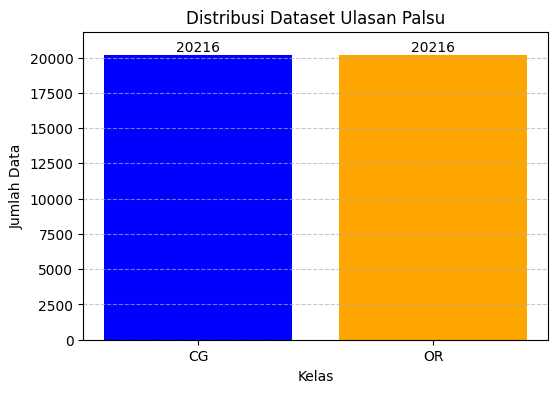

In [12]:
from collections import Counter
import matplotlib.pyplot as plt

train_counts = Counter(df['label'].astype(str))

label_mapping = {'0': 'OR', '1': 'CG'}
mapped_keys = [label_mapping[key] for key in train_counts.keys()]

plt.figure(figsize=(6, 4))
bars = plt.bar(mapped_keys, train_counts.values(), color=['blue', 'orange'])

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{int(height)}',
        ha='center',
        va='bottom'
    )

plt.xlabel("Kelas")
plt.ylabel("Jumlah Data")
plt.title("Distribusi Dataset Ulasan Palsu")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.margins(y=0.08)

plt.show()


## Data Splitting

In [13]:
X_train, X_test, y_train, y_test = train_test_split(df, df['label'], test_size=0.2, random_state=42, stratify=df['label'])

In [14]:
label_counts = y_train.value_counts()

print("Jumlah Real Review Train (0):", label_counts[0])
print("Jumlah Fake Review Train (1):", label_counts[1])

Jumlah Real Review Train (0): 16172
Jumlah Fake Review Train (1): 16173


In [15]:
label_counts = y_test.value_counts()

print("Jumlah Real Review Test (0):", label_counts[0])
print("Jumlah Fake Review Test (1):", label_counts[1])

Jumlah Real Review Test (0): 4044
Jumlah Fake Review Test (1): 4043


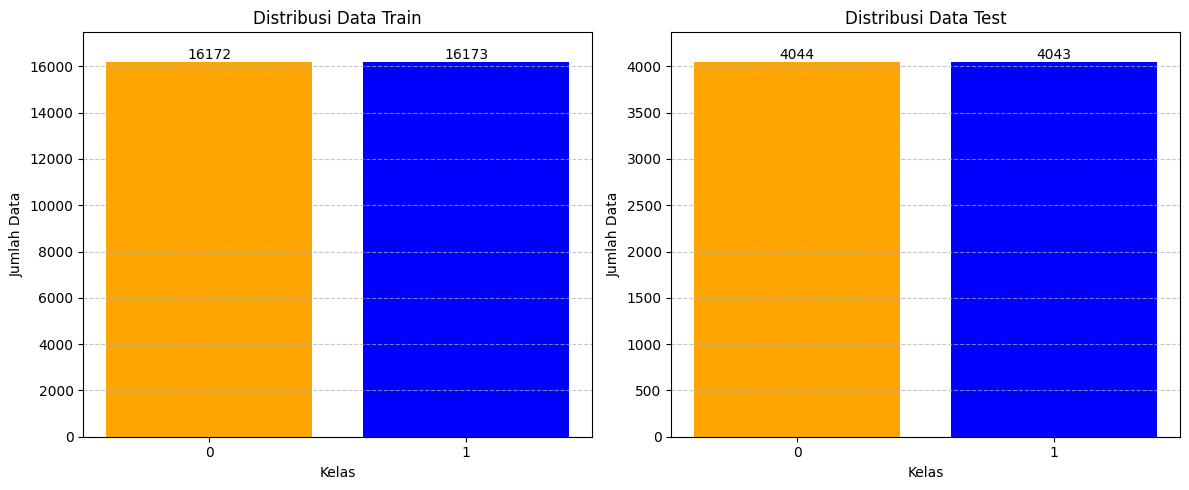

In [16]:
train_counts = Counter(y_train)
test_counts = Counter(y_test)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

bars_train = axes[0].bar(train_counts.keys(), train_counts.values(), color=['blue', 'orange'])
axes[0].set_title('Distribusi Data Train')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['0', '1'])
axes[0].set_xlabel('Kelas')
axes[0].set_ylabel('Jumlah Data')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)
axes[0].margins(y=0.08)

for bar in bars_train:
    height = bar.get_height()
    axes[0].text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{int(height)}',
        ha='center',
        va='bottom'
    )

bars_test = axes[1].bar(test_counts.keys(), test_counts.values(), color=['blue', 'orange'])
axes[1].set_title('Distribusi Data Test')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['0', '1'])
axes[1].set_xlabel('Kelas')
axes[1].set_ylabel('Jumlah Data')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)
axes[1].margins(y=0.08)

for bar in bars_test:
    height = bar.get_height()
    axes[1].text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{int(height)}',
        ha='center',
        va='bottom'
    )

plt.tight_layout()
plt.show()

## TF-IDF

In [17]:
vectorizer = TfidfVectorizer(ngram_range=(1,2), min_df=30, max_df=0.90, strip_accents='unicode', sublinear_tf=True)
X_train_tfidf = vectorizer.fit_transform(X_train['cleaned_text'])
X_test_tfidf = vectorizer.transform(X_test['cleaned_text'])

In [18]:
print("Jumlah fitur yang diekstrak:", len(vectorizer.vocabulary_))

Jumlah fitur yang diekstrak: 10256


In [19]:
df_train_tfidf = pd.DataFrame(X_train_tfidf.toarray(), columns=vectorizer.get_feature_names_out())
df_test_tfidf = pd.DataFrame(X_test_tfidf.toarray(), columns=vectorizer.get_feature_names_out())

print("Data hasil ekstraksi (train):\n", df_train_tfidf.head())
print("Data hasil ekstraksi (test):\n", df_test_tfidf.head())

Data hasil ekstraksi (train):
     aa  ability  ability to  able  able to  about  about an  about and  \
0  0.0      0.0         0.0   0.0      0.0    0.0       0.0        0.0   
1  0.0      0.0         0.0   0.0      0.0    0.0       0.0        0.0   
2  0.0      0.0         0.0   0.0      0.0    0.0       0.0        0.0   
3  0.0      0.0         0.0   0.0      0.0    0.0       0.0        0.0   
4  0.0      0.0         0.0   0.0      0.0    0.0       0.0        0.0   

   about buying  about getting  ...  youtube  youve   yr  yr old  zero  zip  \
0           0.0            0.0  ...      0.0    0.0  0.0     0.0   0.0  0.0   
1           0.0            0.0  ...      0.0    0.0  0.0     0.0   0.0  0.0   
2           0.0            0.0  ...      0.0    0.0  0.0     0.0   0.0  0.0   
3           0.0            0.0  ...      0.0    0.0  0.0     0.0   0.0  0.0   
4           0.0            0.0  ...      0.0    0.0  0.0     0.0   0.0  0.0   

   zipper  zipper is  zippers  zoom  
0     0.0  

In [20]:
print(df_train_tfidf.iloc[[0, 1, 2, 3, -1], [-1]])
print(df_train_tfidf.iloc[[-1], list(range(6)) + [-1]])

       zoom
0       0.0
1       0.0
2       0.0
3       0.0
32344   0.0
        aa  ability  ability to  able  able to  about  zoom
32344  0.0      0.0         0.0   0.0      0.0    0.0   0.0


In [21]:
print(df_test_tfidf.iloc[[0, 1, 2, 3, -1], [-1]])
print(df_test_tfidf.iloc[[-1], list(range(6)) + [-1]])

      zoom
0      0.0
1      0.0
2      0.0
3      0.0
8086   0.0
       aa  ability  ability to  able  able to  about  zoom
8086  0.0      0.0         0.0   0.0      0.0    0.0   0.0


In [22]:
process = psutil.Process(os.getpid())

## Unoptimized

In [23]:
rf_model = RandomForestClassifier(random_state=42)
svm_model = SVC()
nb_model = MultinomialNB()
xgb_model = XGBClassifier(random_state=42)

In [24]:
rf_model.fit(X_train_tfidf, y_train)
svm_model.fit(X_train_tfidf, y_train)
nb_model.fit(X_train_tfidf, y_train)
xgb_model.fit(X_train_tfidf, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [25]:
gc.collect()
mem_before = process.memory_info().rss
start_time = time.time()

rf_y_pred = rf_model.predict(X_test_tfidf)

end_time = time.time()
mem_after = process.memory_info().rss
mem_diff = mem_after - mem_before
print(f"  Inference Time     : {end_time - start_time:.6f} sec")
print(f"  Memory Used (RSS)  : {mem_diff / 1024:.6f} KB\n")
print(f"  Memory Used (RSS)  : {mem_diff:.6f} B\n")

  Inference Time     : 0.295115 sec
  Memory Used (RSS)  : 128.000000 KB

  Memory Used (RSS)  : 131072.000000 B



In [26]:
gc.collect()
mem_before = process.memory_info().rss
start_time = time.time()

svm_y_pred = svm_model.predict(X_test_tfidf)

end_time = time.time()
mem_after = process.memory_info().rss
mem_diff = mem_after - mem_before
print(f"  Inference Time     : {end_time - start_time:.6f} sec")
print(f"  Memory Used (RSS)  : {mem_diff / 1024:.6f} KB\n")
print(f"  Memory Used (RSS)  : {mem_diff:.6f} B\n")

  Inference Time     : 38.656014 sec
  Memory Used (RSS)  : -186584.000000 KB

  Memory Used (RSS)  : -191062016.000000 B



In [27]:
gc.collect()
mem_before = process.memory_info().rss
start_time = time.time()

nb_y_pred = nb_model.predict(X_test_tfidf)

end_time = time.time()
mem_after = process.memory_info().rss
mem_diff = mem_after - mem_before
print(f"  Inference Time     : {end_time - start_time:.6f} sec")
print(f"  Memory Used (RSS)  : {mem_diff / 1024:.6f} KB\n")
print(f"  Memory Used (RSS)  : {mem_diff:.6f} B\n")

  Inference Time     : 0.003288 sec
  Memory Used (RSS)  : 0.000000 KB

  Memory Used (RSS)  : 0.000000 B



In [28]:
gc.collect()
mem_before = process.memory_info().rss
start_time = time.time()

xgb_y_pred = xgb_model.predict(X_test_tfidf)

end_time = time.time()
mem_after = process.memory_info().rss
mem_diff = mem_after - mem_before
print(f"  Inference Time     : {end_time - start_time:.6f} sec")
print(f"  Memory Used (RSS)  : {mem_diff / 1024:.6f} KB\n")
print(f"  Memory Used (RSS)  : {mem_diff:.6f} B\n")

  Inference Time     : 0.015635 sec
  Memory Used (RSS)  : 128.000000 KB

  Memory Used (RSS)  : 131072.000000 B



RF

In [29]:
accuracy = accuracy_score(y_test, rf_y_pred)
print(f'Akurasi: {accuracy:.4f}')

precision_cg = precision_score(y_test, rf_y_pred)
print(f'Presisi (Fake Review): {precision_cg:.4f}')

recall_cg = recall_score(y_test, rf_y_pred)
print(f'Recall (Fake Review): {recall_cg:.4f}')

f1_cg = f1_score(y_test, rf_y_pred)
print(f'F1-Score (Fake Review): {f1_cg:.4f}')

Akurasi: 0.9038
Presisi (Fake Review): 0.9306
Recall (Fake Review): 0.8726
F1-Score (Fake Review): 0.9007


SVM

In [30]:
accuracy = accuracy_score(y_test, svm_y_pred)
print(f'Akurasi: {accuracy:.4f}')

precision_cg = precision_score(y_test, svm_y_pred)
print(f'Presisi (Fake Review): {precision_cg:.4f}')

recall_cg = recall_score(y_test, svm_y_pred)
print(f'Recall (Fake Review): {recall_cg:.4f}')

f1_cg = f1_score(y_test, svm_y_pred)
print(f'F1-Score (Fake Review): {f1_cg:.4f}')

Akurasi: 0.9504
Presisi (Fake Review): 0.9612
Recall (Fake Review): 0.9387
F1-Score (Fake Review): 0.9498


NB

In [31]:
accuracy = accuracy_score(y_test, nb_y_pred)
print(f'Akurasi: {accuracy:.4f}')

precision_cg = precision_score(y_test, nb_y_pred)
print(f'Presisi (Fake Review): {precision_cg:.4f}')

recall_cg = recall_score(y_test, nb_y_pred)
print(f'Recall (Fake Review): {recall_cg:.4f}')

f1_cg = f1_score(y_test, nb_y_pred)
print(f'F1-Score (Fake Review): {f1_cg:.4f}')

Akurasi: 0.9026
Presisi (Fake Review): 0.8974
Recall (Fake Review): 0.9090
F1-Score (Fake Review): 0.9032


XGB

In [32]:
accuracy = accuracy_score(y_test, xgb_y_pred)
print(f'Akurasi: {accuracy:.4f}')

precision_cg = precision_score(y_test, xgb_y_pred)
print(f'Presisi (Fake Review): {precision_cg:.4f}')

recall_cg = recall_score(y_test, xgb_y_pred)
print(f'Recall (Fake Review): {recall_cg:.4f}')

f1_cg = f1_score(y_test, xgb_y_pred)
print(f'F1-Score (Fake Review): {f1_cg:.4f}')

Akurasi: 0.9028
Presisi (Fake Review): 0.9183
Recall (Fake Review): 0.8842
F1-Score (Fake Review): 0.9010


## Optimized

In [33]:
rf_model2 = joblib.load('/kaggle/input/fake-reviews-detection-models/scikitlearn/default/1/rf.pkl')
svm_model2 = joblib.load('/kaggle/input/fake-reviews-detection-models/scikitlearn/default/1/svm.pkl')
nb_model2 = joblib.load('/kaggle/input/fake-reviews-detection-models/scikitlearn/default/1/nb.pkl')
xgb_model2 = XGBClassifier()
xgb_model2.load_model('/kaggle/input/fake-reviews-detection-models/scikitlearn/default/1/xgb.json')

In [34]:
gc.collect()
mem_before = process.memory_info().rss
start_time = time.time()

rf_y_pred2 = rf_model2.predict(X_test_tfidf)

end_time = time.time()
mem_after = process.memory_info().rss
mem_diff = mem_after - mem_before
print(f"  Inference Time     : {end_time - start_time:.6f} sec")
print(f"  Memory Used (RSS)  : {mem_diff / 1024:.6f} KB\n")
print(f"  Memory Used (RSS)  : {mem_diff:.6f} B\n")

  Inference Time     : 0.811948 sec
  Memory Used (RSS)  : 4224.000000 KB

  Memory Used (RSS)  : 4325376.000000 B



In [35]:
gc.collect()
mem_before = process.memory_info().rss
start_time = time.time()

svm_y_pred2 = svm_model2.predict(X_test_tfidf)

end_time = time.time()
mem_after = process.memory_info().rss
mem_diff = mem_after - mem_before
print(f"  Inference Time     : {end_time - start_time:.6f} sec")
print(f"  Memory Used (RSS)  : {mem_diff / 1024:.6f} KB\n")
print(f"  Memory Used (RSS)  : {mem_diff:.6f} B\n")

  Inference Time     : 43.333930 sec
  Memory Used (RSS)  : 0.000000 KB

  Memory Used (RSS)  : 0.000000 B



In [36]:
gc.collect()
mem_before = process.memory_info().rss
start_time = time.time()

nb_y_pred2 = nb_model2.predict(X_test_tfidf)

end_time = time.time()
mem_after = process.memory_info().rss
mem_diff = mem_after - mem_before
print(f"  Inference Time     : {end_time - start_time:.6f} sec")
print(f"  Memory Used (RSS)  : {mem_diff / 1024:.6f} KB\n")
print(f"  Memory Used (RSS)  : {mem_diff:.6f} B\n")

  Inference Time     : 0.003322 sec
  Memory Used (RSS)  : 0.000000 KB

  Memory Used (RSS)  : 0.000000 B



In [37]:
gc.collect()
mem_before = process.memory_info().rss
start_time = time.time()

xgb_y_pred2 = xgb_model2.predict(X_test_tfidf)

end_time = time.time()
mem_after = process.memory_info().rss
mem_diff = mem_after - mem_before
print(f"  Inference Time     : {end_time - start_time:.6f} sec")
print(f"  Memory Used (RSS)  : {mem_diff / 1024:.6f} KB\n")
print(f"  Memory Used (RSS)  : {mem_diff:.6f} B\n")

  Inference Time     : 0.064130 sec
  Memory Used (RSS)  : 0.000000 KB

  Memory Used (RSS)  : 0.000000 B



RF

In [38]:
accuracy = accuracy_score(y_test, rf_y_pred2)
print(f'Akurasi: {accuracy:.4f}')

precision_cg = precision_score(y_test, rf_y_pred2)
print(f'Presisi (Fake Review): {precision_cg:.4f}')

recall_cg = recall_score(y_test, rf_y_pred2)
print(f'Recall (Fake Review): {recall_cg:.4f}')

f1_cg = f1_score(y_test, rf_y_pred2)
print(f'F1-Score (Fake Review): {f1_cg:.4f}')

Akurasi: 0.9248
Presisi (Fake Review): 0.9467
Recall (Fake Review): 0.9003
F1-Score (Fake Review): 0.9229


SVM

In [39]:
accuracy = accuracy_score(y_test, svm_y_pred2)
print(f'Akurasi: {accuracy:.4f}')

precision_cg = precision_score(y_test, svm_y_pred2)
print(f'Presisi (Fake Review): {precision_cg:.4f}')

recall_cg = recall_score(y_test, svm_y_pred2)
print(f'Recall (Fake Review): {recall_cg:.4f}')

f1_cg = f1_score(y_test, svm_y_pred2)
print(f'F1-Score (Fake Review): {f1_cg:.4f}')

Akurasi: 0.9531
Presisi (Fake Review): 0.9612
Recall (Fake Review): 0.9443
F1-Score (Fake Review): 0.9527


NB

In [40]:
accuracy = accuracy_score(y_test, nb_y_pred2)
print(f'Akurasi: {accuracy:.4f}')

precision_cg = precision_score(y_test, nb_y_pred2)
print(f'Presisi (Fake Review): {precision_cg:.4f}')

recall_cg = recall_score(y_test, nb_y_pred2)
print(f'Recall (Fake Review): {recall_cg:.4f}')

f1_cg = f1_score(y_test, nb_y_pred2)
print(f'F1-Score (Fake Review): {f1_cg:.4f}')

Akurasi: 0.9049
Presisi (Fake Review): 0.9054
Recall (Fake Review): 0.9043
F1-Score (Fake Review): 0.9048


XGB

In [41]:
accuracy = accuracy_score(y_test, xgb_y_pred2)
print(f'Akurasi: {accuracy:.4f}')

precision_cg = precision_score(y_test, xgb_y_pred2)
print(f'Presisi (Fake Review): {precision_cg:.4f}')

recall_cg = recall_score(y_test, xgb_y_pred2)
print(f'Recall (Fake Review): {recall_cg:.4f}')

f1_cg = f1_score(y_test, xgb_y_pred2)
print(f'F1-Score (Fake Review): {f1_cg:.4f}')

Akurasi: 0.9343
Presisi (Fake Review): 0.9419
Recall (Fake Review): 0.9258
F1-Score (Fake Review): 0.9338


## Comparison

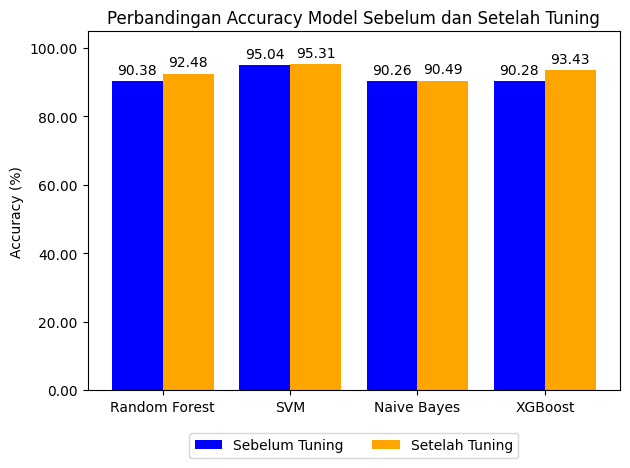

In [42]:
models = ['Random Forest', 'SVM', 'Naive Bayes', 'XGBoost']
accuracy_before = [accuracy_score(y_test, rf_y_pred), accuracy_score(y_test, svm_y_pred), accuracy_score(y_test, nb_y_pred), accuracy_score(y_test, xgb_y_pred)]
accuracy_after = [accuracy_score(y_test, rf_y_pred2), accuracy_score(y_test, svm_y_pred2), accuracy_score(y_test, nb_y_pred2), accuracy_score(y_test, xgb_y_pred2)]

x = np.arange(len(models))
width = 0.40

fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, accuracy_before, width, label='Sebelum Tuning', color='blue')
bars2 = ax.bar(x + width/2, accuracy_after, width, label='Setelah Tuning', color='orange')

for bar in bars1:
    height = bar.get_height()
    ax.annotate(f"{height*100:.2f}",
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

for bar in bars2:
    height = bar.get_height()
    ax.annotate(f"{height*100:.2f}",
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

formatter = FuncFormatter(lambda y, _: f'{y*100:.2f}')
ax.yaxis.set_major_formatter(formatter)

ax.set_ylabel('Accuracy (%)')
ax.set_title('Perbandingan Accuracy Model Sebelum dan Setelah Tuning')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), ncol=2)
ax.margins(y=0.1)

plt.tight_layout()
plt.show()